In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# FITTING AND EVALUATING

# LOAD
dataSet = load_iris()
type(dataSet)

# With dates
ALL     = pd.read_csv("Data/Datasets/Dataset_ALL.csv")

# Without dates
#ALL     = pd.read_csv("Data/Datasets/Dataset_ALL_noDate.csv")


ALL_raw = ALL
Classification = ALL_raw['Classification']

ALL_raw = ALL_raw.drop(['Classification'],axis=1)
ALL_raw = ALL_raw.drop(['Unnamed: 0'],axis=1)



KNN:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       898
           1       0.91      0.91      0.91      1646

    accuracy                           0.88      2544
   macro avg       0.87      0.87      0.87      2544
weighted avg       0.88      0.88      0.88      2544

LDA:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       898
           1       0.91      0.94      0.93      1646

    accuracy                           0.90      2544
   macro avg       0.90      0.89      0.89      2544
weighted avg       0.90      0.90      0.90      2544

QDA:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       898
           1       0.94      0.85      0.89      1646

    accuracy                           0.87      2544
   macro avg       0.85      0.88      0.86      2544
weighted avg       0.88      0.87      0.87      2544

TREE

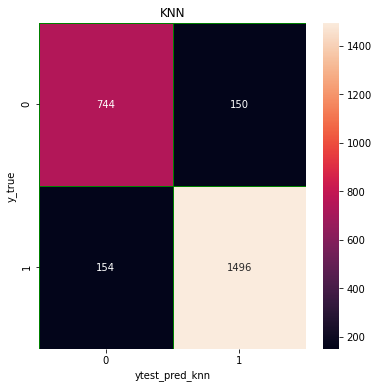

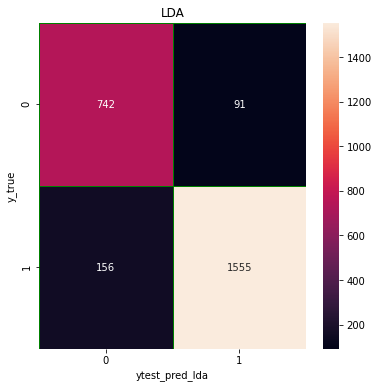

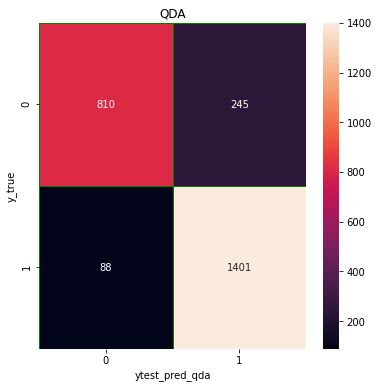

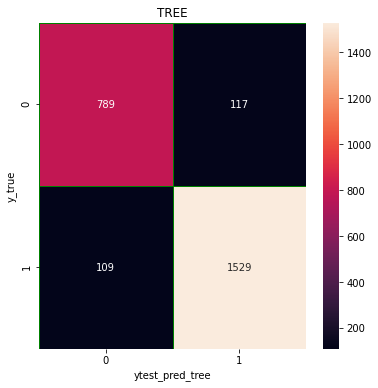

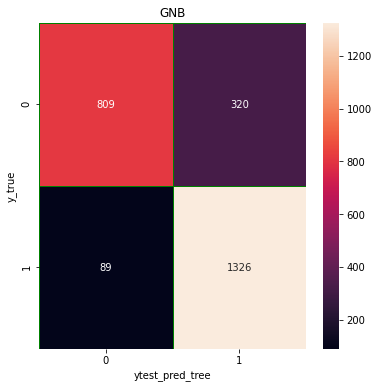

In [46]:
X = ALL_raw
y = Classification

# split the data with 70% in each set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, train_size=0.7)

# SELECT CLASSIFIER
model_knn  = KNeighborsClassifier(n_neighbors=5)
model_lda  = LinearDiscriminantAnalysis(n_components=None,priors=None, store_covariance=True)
model_qda  = QuadraticDiscriminantAnalysis(priors=None,store_covariance=True)
model_tree = DecisionTreeClassifier()
model_gnb  = GaussianNB()


# FIT the model on one set of data
model_knn.fit(Xtrain, ytrain)
model_lda.fit(Xtrain, ytrain)
model_qda.fit(Xtrain, ytrain)
model_tree.fit(Xtrain, ytrain)
model_gnb.fit(Xtrain, ytrain)

# TEST evaluate the model on the second set of data
ytest_pred_knn  = model_knn.predict(Xtest)
ytest_pred_lda  = model_lda.predict(Xtest)
ytest_pred_qda  = model_qda.predict(Xtest)
ytest_pred_tree = model_tree.predict(Xtest)
ytest_pred_gnb  = model_gnb.predict(Xtest)

# Classification Report
print('KNN:')
print(classification_report(ytest, ytest_pred_knn))
print('LDA:')
print(classification_report(ytest, ytest_pred_lda))
print('QDA:')
print(classification_report(ytest, ytest_pred_qda))
print('TREE:')
print(classification_report(ytest, ytest_pred_tree))
print('GNB:')
print(classification_report(ytest, ytest_pred_gnb))


# Cross Validarion Scores
scores_knn  = cross_val_score(model_knn,  Xtest, ytest, cv=5)
scores_lda  = cross_val_score(model_lda,  Xtest, ytest, cv=5)
scores_qda  = cross_val_score(model_qda,  Xtest, ytest, cv=5)
scores_tree = cross_val_score(model_tree, Xtest, ytest, cv=5)
scores_gnb  = cross_val_score(model_gnb,  Xtest, ytest, cv=5)


# Cross Validation 
print("Accuracy KNN: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy LDA: %0.2f (+/- %0.2f)" % (scores_lda.mean(), scores_lda.std() * 2))
print("Accuracy QDA: %0.2f (+/- %0.2f)" % (scores_qda.mean(), scores_qda.std() * 2))
print("Accuracy TREE: %0.2f (+/- %0.2f)" % (scores_tree.mean(), scores_tree.std() * 2))
print("Accuracy GNB: %0.2f (+/- %0.2f)" % (scores_gnb.mean(), scores_gnb.std() * 2))


# Confusion Matrix Plot
cm1 = confusion_matrix(ytest_pred_knn, ytest)
cm2 = confusion_matrix(ytest_pred_lda, ytest)
cm3 = confusion_matrix(ytest_pred_qda, ytest)
cm4 = confusion_matrix(ytest_pred_tree, ytest)
cm5 = confusion_matrix(ytest_pred_gnb, ytest)


plt.figure(figsize=(6, 6))
sns.heatmap(cm1,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_knn")
plt.ylabel("y_true")
plt.title('KNN')


plt.figure(figsize=(6, 6))
sns.heatmap(cm2,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_lda")
plt.ylabel("y_true")
plt.title('LDA')


plt.figure(figsize=(6, 6))
sns.heatmap(cm3,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_qda")
plt.ylabel("y_true")
plt.title('QDA')
plt.show()


plt.figure(figsize=(6, 6))
sns.heatmap(cm4,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_tree")
plt.ylabel("y_true")
plt.title('TREE')
plt.show()


plt.figure(figsize=(6, 6))
sns.heatmap(cm5,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_tree")
plt.ylabel("y_true")
plt.title('GNB')
plt.show()